In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [80]:
data = pd.read_csv('/content/results.csv')


total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 23777


In [81]:
# Первые 5 строк датасета
data.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1


In [82]:
# размер набора данных
data.shape

(23777, 18)

In [83]:
# типы колонок
data.dtypes


resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number             float64
grid                 int64
position           float64
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds       float64
fastestLap         float64
rank               float64
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object

In [84]:
data.isnull().sum()

resultId               0
raceId                 0
driverId               0
constructorId          0
number                 6
grid                   0
position           10550
positionText           0
positionOrder          0
points                 0
laps                   0
time               17773
milliseconds       17774
fastestLap         18394
rank               18246
fastestLapTime     18394
fastestLapSpeed    18394
statusId               0
dtype: int64

In [85]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((23777, 18), (23777, 10))

In [86]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((23777, 18), (2604, 18))

In [87]:
data.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1


In [88]:
# Заполнение всех пропущенных значений нулями
data_new_3 = data.fillna(0)
data_new_3.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1


In [89]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка number. Тип данных float64. Количество пустых значений 6, 0.03%.
Колонка position. Тип данных float64. Количество пустых значений 10550, 44.37%.
Колонка milliseconds. Тип данных float64. Количество пустых значений 17774, 74.75%.
Колонка fastestLap. Тип данных float64. Количество пустых значений 18394, 77.36%.
Колонка rank. Тип данных float64. Количество пустых значений 18246, 76.74%.


In [90]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,number,position,milliseconds,fastestLap,rank
0,22.0,1.0,5690616.0,39.0,2.0
1,3.0,2.0,5696094.0,41.0,3.0
2,7.0,3.0,5698779.0,41.0,5.0
3,5.0,4.0,5707797.0,58.0,7.0
4,23.0,5.0,5708630.0,43.0,1.0
...,...,...,...,...,...
23772,10.0,16.0,NaN,33.0,16.0
23773,9.0,17.0,NaN,36.0,15.0
23774,18.0,18.0,NaN,52.0,6.0
23775,55.0,NaN,NaN,26.0,14.0


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


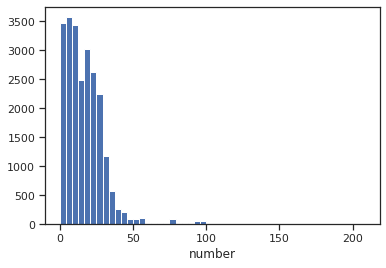

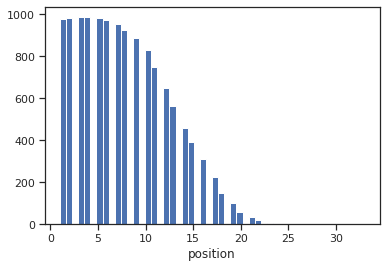

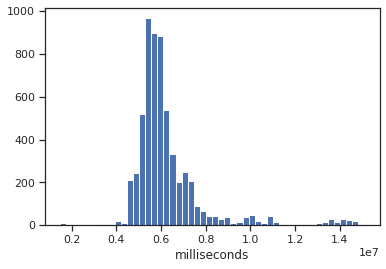

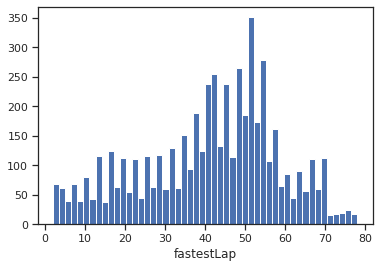

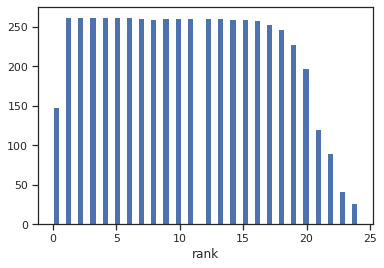

In [91]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [92]:
# Фильтр по пустым значениям поля salary 
data[data['position'].isnull()]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
8,9,18,9,2,4.0,2,NaN,R,9,0.0,47,NaN,NaN,15.0,9.0,01:28.8,215.1,4
9,10,18,10,7,12.0,18,NaN,R,10,0.0,43,NaN,NaN,23.0,13.0,01:29.6,213.166,3
10,11,18,11,8,18.0,19,NaN,R,11,0.0,32,NaN,NaN,24.0,15.0,01:30.9,210.038,7
11,12,18,12,4,6.0,20,NaN,R,12,0.0,30,NaN,NaN,20.0,16.0,01:31.4,208.907,8
12,13,18,13,6,2.0,4,NaN,R,13,0.0,29,NaN,NaN,23.0,6.0,01:28.2,216.51,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23754,23759,987,839,10,31.0,10,NaN,R,18,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN,3
23755,23760,987,838,1,2.0,12,NaN,R,19,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN,3
23756,23761,987,825,210,20.0,13,NaN,R,20,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN,3
23775,23780,988,832,4,55.0,12,NaN,R,19,0.0,31,NaN,NaN,26.0,14.0,01:43.4,193.41,36


In [93]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['position'].isnull()].index
flt_index

Int64Index([    8,     9,    10,    11,    12,    13,    14,    15,    16,
               17,
            ...
            23733, 23734, 23735, 23736, 23753, 23754, 23755, 23756, 23775,
            23776],
           dtype='int64', length=10550)

In [94]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
8,9,18,9,2,4.0,2,NaN,R,9,0.0,47,NaN,NaN,15.0,9.0,01:28.8,215.1,4
9,10,18,10,7,12.0,18,NaN,R,10,0.0,43,NaN,NaN,23.0,13.0,01:29.6,213.166,3
10,11,18,11,8,18.0,19,NaN,R,11,0.0,32,NaN,NaN,24.0,15.0,01:30.9,210.038,7
11,12,18,12,4,6.0,20,NaN,R,12,0.0,30,NaN,NaN,20.0,16.0,01:31.4,208.907,8
12,13,18,13,6,2.0,4,NaN,R,13,0.0,29,NaN,NaN,23.0,6.0,01:28.2,216.51,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23754,23759,987,839,10,31.0,10,NaN,R,18,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN,3
23755,23760,987,838,1,2.0,12,NaN,R,19,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN,3
23756,23761,987,825,210,20.0,13,NaN,R,20,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN,3
23775,23780,988,832,4,55.0,12,NaN,R,19,0.0,31,NaN,NaN,26.0,14.0,01:43.4,193.41,36


In [95]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['position']

8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
         ..
23754   NaN
23755   NaN
23756   NaN
23775   NaN
23776   NaN
Name: position, Length: 10550, dtype: float64

In [96]:
data_num_position = data_num[['position']]
data_num_position.head()

,position
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


In [0]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [98]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_position)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [0]:
strategies=['mean', 'median','most_frequent']

In [0]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_position)
    return data_num_imp[mask_missing_values_only]

In [101]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([7.78226355, 7.78226355, 7.78226355, ..., 7.78226355, 7.78226355,
        7.78226355]))

In [102]:
strategies[1], test_num_impute(strategies[1])

('median', array([7., 7., 7., ..., 7., 7., 7.]))

In [103]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([3., 3., 3., ..., 3., 3., 3.]))

In [0]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [105]:
data[['position']].describe()

,position
count,13227.000000
mean,7.782264
std,4.745105
min,1.000000
25%,4.000000
50%,7.000000
75%,11.000000
max,33.000000


In [106]:
test_num_impute_col(data, 'position', strategies[0])

('position', 'mean', 10550, 7.782263551825811, 7.782263551825811)

In [107]:
test_num_impute_col(data, 'position', strategies[1])

('position', 'median', 10550, 7.0, 7.0)

In [108]:
test_num_impute_col(data, 'position', strategies[2])

('position', 'most_frequent', 10550, 3.0, 3.0)

In [0]:
#........................................................................................

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [110]:
data = pd.read_csv('/content/datasets_468218_878459_drivers.csv')
data.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [0]:
le = LabelEncoder()

In [113]:
cat_temp_data = data[['nationality']]
cat_temp_data.head()

,nationality
0,British
1,German
2,German
3,Spanish
4,Finnish


In [0]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)

In [115]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,British
1,German
2,German
3,Spanish
4,Finnish
...,...
842,Monegasque
843,Russian
844,British
845,British


In [116]:
cat_enc['c1'].unique()

array(['British', 'German', 'Spanish', 'Finnish', 'Japanese', 'French',
       'Polish', 'Brazilian', 'Italian', 'Australian', 'Austrian',
       'American', 'Dutch', 'Colombian', 'Portuguese', 'Canadian',
       'Indian', 'Hungarian', 'Irish', 'Danish', 'Argentine', 'Czech',
       'Malaysian', 'Swiss', 'Belgian', 'Monegasque', 'Swedish',
       'Venezuelan', 'New Zealander', 'Chilean', 'Mexican',
       'South African', 'Liechtensteiner', 'Rhodesian',
       'American-Italian', 'Uruguayan', 'Argentine-Italian', 'Thai',
       'East German', 'Russian', 'Indonesian'], dtype=object)

In [117]:
cat_enc_le = le.fit_transform(cat_enc['c1'])
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])

In [118]:
le.inverse_transform([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])

array(['American', 'American-Italian', 'Argentine', 'Argentine-Italian',
       'Australian', 'Austrian', 'Belgian', 'Brazilian', 'British',
       'Canadian', 'Chilean', 'Colombian', 'Czech', 'Danish', 'Dutch',
       'East German', 'Finnish', 'French', 'German', 'Hungarian',
       'Indian', 'Indonesian', 'Irish', 'Italian', 'Japanese',
       'Liechtensteiner', 'Malaysian', 'Mexican', 'Monegasque',
       'New Zealander', 'Polish', 'Portuguese', 'Rhodesian', 'Russian',
       'South African', 'Spanish', 'Swedish', 'Swiss', 'Thai',
       'Uruguayan', 'Venezuelan'], dtype=object)

In [0]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [120]:
cat_enc.shape

(847, 1)

In [121]:
cat_enc_ohe.shape

(847, 41)

In [122]:
cat_enc_ohe

<847x41 sparse matrix of type '<class 'numpy.float64'>'
	with 847 stored elements in Compressed Sparse Row format>

In [123]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.,

In [124]:
cat_enc.head(10)

,c1
0,British
1,German
2,German
3,Spanish
4,Finnish
5,Japanese
6,French
7,Finnish
8,Polish
9,German


In [125]:
pd.get_dummies(cat_enc).head()

,c1_American,c1_American-Italian,c1_Argentine,c1_Argentine-Italian,c1_Australian,c1_Austrian,c1_Belgian,c1_Brazilian,c1_British,c1_Canadian,c1_Chilean,c1_Colombian,c1_Czech,c1_Danish,c1_Dutch,c1_East German,c1_Finnish,c1_French,c1_German,c1_Hungarian,c1_Indian,c1_Indonesian,c1_Irish,c1_Italian,c1_Japanese,c1_Liechtensteiner,c1_Malaysian,c1_Mexican,c1_Monegasque,c1_New Zealander,c1_Polish,c1_Portuguese,c1_Rhodesian,c1_Russian,c1_South African,c1_Spanish,c1_Swedish,c1_Swiss,c1_Thai,c1_Uruguayan,c1_Venezuelan
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [126]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,nationality_American,nationality_American-Italian,nationality_Argentine,nationality_Argentine-Italian,nationality_Australian,nationality_Austrian,nationality_Belgian,nationality_Brazilian,nationality_British,nationality_Canadian,nationality_Chilean,nationality_Colombian,nationality_Czech,nationality_Danish,nationality_Dutch,nationality_East German,nationality_Finnish,nationality_French,nationality_German,nationality_Hungarian,nationality_Indian,nationality_Indonesian,nationality_Irish,nationality_Italian,nationality_Japanese,nationality_Liechtensteiner,nationality_Malaysian,nationality_Mexican,nationality_Monegasque,nationality_New Zealander,nationality_Polish,nationality_Portuguese,nationality_Rhodesian,nationality_Russian,nationality_South African,nationality_Spanish,nationality_Swedish,nationality_Swiss,nationality_Thai,nationality_Uruguayan,nationality_Venezuelan,nationality_nan
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [0]:
data = pd.read_csv('/content/results.csv')
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['milliseconds']])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


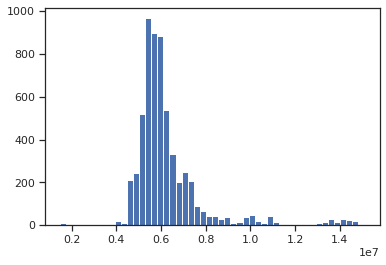

In [129]:
plt.hist(data['milliseconds'], 50)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


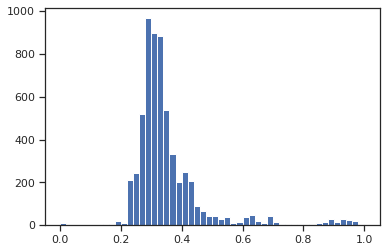

In [130]:
plt.hist(sc1_data, 50)
plt.show()

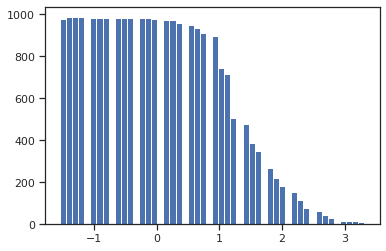

In [131]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['positionOrder']])

plt.hist(sc2_data, 50)
plt.show()

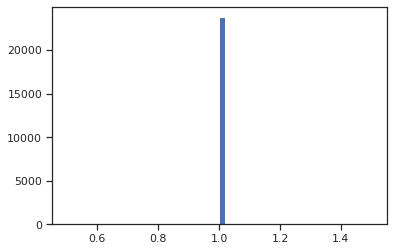

In [132]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['positionOrder']])


plt.hist(sc3_data, 50)
plt.show()